# Distribution of TDCR measurements

In [1]:
# pip install TDCRPy --upgrade

In [2]:
import tdcrpy as td
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

## Record the decay histories in temporary files

In [3]:
mode = "eff"                # ask for efficiency calculation
Rad="Cd-109"                # radionuclides
pmf_1="1"                   # relatives fractions of the radionulides
N = 1500                    # number of Monte Carlo trials
kB =1.0e-5                  # Birks constant in cm keV-1
V = 10                      # volume of scintillator in mL
L=1                         # free parameter in keV-1

out = td.TDCRPy.TDCRPy(1, Rad, pmf_1, N, kB, V, mode, record=True, barp=True)


 ______  ______  ______ _______  ________
|__  __||  ___ \|  ___||  ___ | |  ____ |
  | |   | |  | || |    | |  | | | |___| |___     ___
  | |   | |  | || |    | |__| | |  _____|\  \   |  |
  | |   | |__| || |____|  __  \ | |       \  \  |  |
  |_|   |_____/ |_____||_|  \__\|_|        \  \_|  |
  +++++++++++++++++++++++++++++++++++++++++/      /
  ________________________________________/      /
 |______________________________________________/     


version 2.0.2
BIPM 2023 - license MIT 
distribution: https://pypi.org/project/TDCRPy 
developement: https://github.com/RomainCoulon/TDCRPy 

start calculation...


Processing: 100%|█████████████████████████████████████████████████████████████| 1500/1500 [00:46<00:00, 32.36 decays/s]


## Read initial energy from the decay process

C:\Users\romain.coulon\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


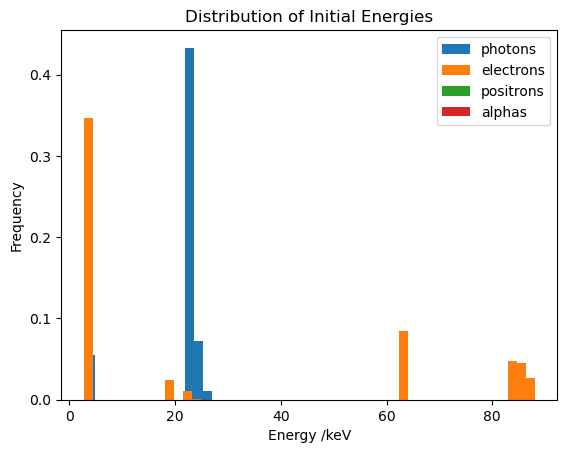

In [4]:
temp1, temp2, temp3, temp4 = td.TDCR_model_lib.read_temp_files()

ee_vec, eg_vec, ep_vec, ea_vec = td.TDCR_model_lib.energyVectors1(temp1)
nbins=50
plt.figure("1")
plt.hist(eg_vec, bins=nbins, edgecolor='none',density=True,label='photons')
plt.hist(ee_vec, bins=nbins, edgecolor='none',density=True,label='electrons')
plt.hist(ep_vec, bins=nbins, edgecolor='none',density=True,label='positrons')
plt.hist(ea_vec, bins=nbins, edgecolor='none',density=True,label='alphas')
plt.title('Distribution of Initial Energies')
plt.xlabel('Energy /keV')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Read deposited energy in the scintillator

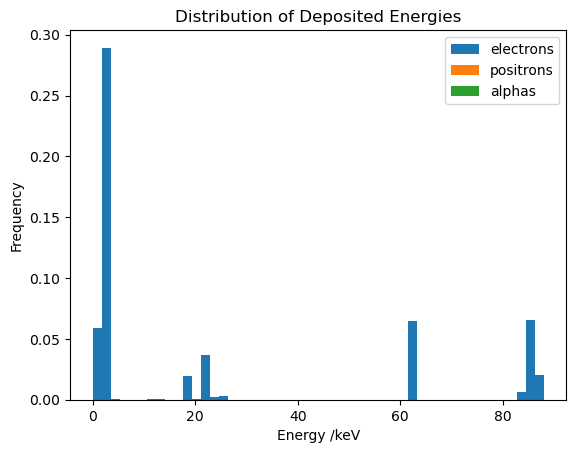

In [5]:
ee_vec, ep_vec, ea_vec = td.TDCR_model_lib.energyVectors2(temp2)
nbins=50
plt.figure("2")
plt.hist(ee_vec, bins=nbins, edgecolor='none',density=True,label='electrons')
plt.hist(ep_vec, bins=nbins, edgecolor='none',density=True,label='positrons')
plt.hist(ea_vec, bins=nbins, edgecolor='none',density=True,label='alphas')
plt.title('Distribution of Deposited Energies')
plt.xlabel('Energy /keV')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Read quenched deposited energy in the scintillator

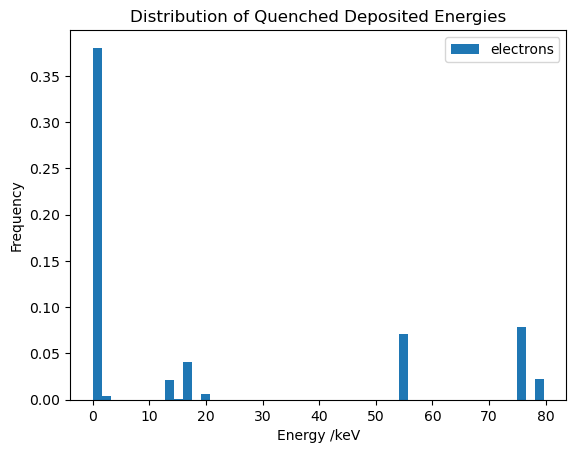

In [6]:
ee_vec = td.TDCR_model_lib.energyVectors3(temp3)
nbins=50
plt.figure("3")
plt.hist(ee_vec, bins=nbins, edgecolor='none',density=True,label='electrons')
plt.title('Distribution of Quenched Deposited Energies')
plt.xlabel('Energy /keV')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Read detection probabilities per decay event

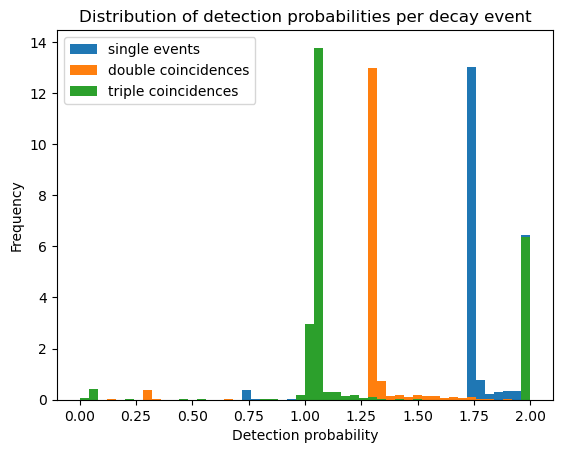

In [7]:
s_vec, d_vec, t_vec = td.TDCR_model_lib.effVector(temp4)
nbins=50
plt.figure("4")
plt.hist(s_vec, bins=nbins, edgecolor='none',density=True,label='single events')
plt.hist(d_vec, bins=nbins, edgecolor='none',density=True,label='double coincidences')
plt.hist(t_vec, bins=nbins, edgecolor='none',density=True,label='triple coincidences')
plt.title('Distribution of detection probabilities per decay event')
plt.xlabel('Detection probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()